In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.shape

(714, 3)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [23]:
trf=ColumnTransformer([
    ('binnig',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform'),[0]),
    ('fare_binnig',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[1])
])

In [24]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [25]:
trf.named_transformers_['binnig'].bin_edges_

array([array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
              26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
              53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
              80.        ])                                                   ],
      dtype=object)

In [26]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [27]:
output.sample(5)

,age,age_trf,fare,fare_trf
73,26.0,4.0,14.4542,7.0
492,55.0,10.0,30.5000,10.0
236,44.0,8.0,26.0000,9.0
254,41.0,7.0,20.2125,8.0
623,21.0,3.0,7.8542,2.0


In [28]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    


0.6359154929577464


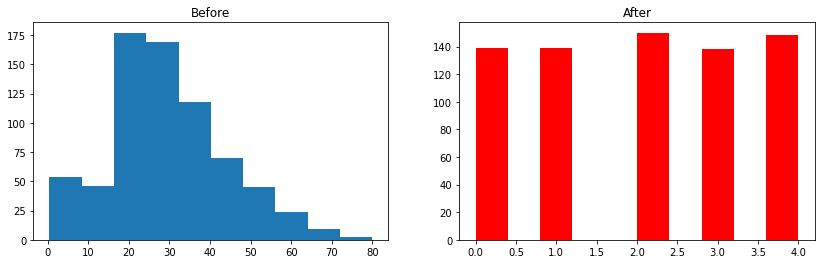

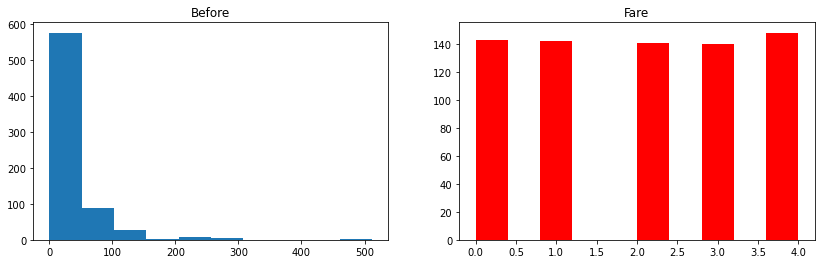

In [31]:
discretize(5,'quantile')